In [0]:
import sys

# Tensorflow
if  not 'tensorflow' in sys.modules:
  !pip install tensorflow

# Numpy
if  not 'numpy' in sys.modules:
  !pip install numpy

# SciPy
if  not 'scipy' in sys.modules:
  !pip install scipy

# OpenCV
if  not 'opencv-python' in sys.modules:
  !pip install opencv-python

# Pillow
if  not 'pillow' in sys.modules:
  !pip install pillow

# Matplotlib
if  not 'matplotlib' in sys.modules:
  !pip install matplotlib

# H5py
if  not 'h5py' in sys.modules:
  !pip install h5py

# Keras
if  not 'keras' in sys.modules:
  !pip install keras
  
# wget
if not 'wget' in sys.modules:
  !pip install wget

In [0]:
# pobieramy bibiotekę imageai z repozytorium GitHub
if  not 'imageai' in sys.modules:
  !pip install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.2/imageai-2.0.2-py3-none-any.whl

In [0]:
# Sprawdzamy wersje zaimportowanych pakietów

import tensorflow
# sprawdzamy jego wersje 
print ('Tensorflow version :',tensorflow.__version__)

import numpy
# sprawdzamy jego wersje 
print ('Numpy version :',numpy.__version__)

import scipy
# sprawdzamy jego wersje 
print ('Scipy version :',scipy.__version__)


import matplotlib
# sprawdzamy jego wersje 
print ('Matplotlib version :',matplotlib.__version__)


import h5py
# sprawdzamy jego wersje 
print ('h5py version :',h5py.__version__)


import keras
# sprawdzamy jego wersje 
print ('Keras version :',keras.__version__)


In [4]:
# pobieramy początkowy katalog
import os
home_directory=os.getcwd()
print(home_directory)

/content


In [5]:
!ls

images	sample_data


In [0]:
!ls -la *.jp*g

In [0]:
# pobranie gotowych modeli
def get_ml_models():
  print("Downloading models.....")
  os.chdir(home_directory)
  os.chdir(images_directory)
  # pobieramy  modele sieci neuronowej
  !wget -c https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5
  #!wget -c https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5
  #!wget -c https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo-tiny.h5
  
  execution_path = os.getcwd()
  !ls -la *.h5
  print("Downloading models..end...")

In [0]:
#uruchomienie modelu
def prepare_model(speed="fast"):
  print("Preparing models.....")
  from imageai.Detection import ObjectDetection
  import os
  os.chdir(images_directory)
  execution_path = os.getcwd()
  detector = ObjectDetection()
  detector.setModelTypeAsRetinaNet()
  detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
  detector.loadModel(detection_speed=speed)
  print("Preparing models..end..")
  return detector

In [0]:
# przetworzenie jednego obrazu
def process_image(detector,image_name,min_percent_prob=30):
  
  from imageai.Detection import ObjectDetection
  import os
  global extracted_images
  global detections
  global output_image
  print("Processing images...")
  execution_path = os.getcwd()
  filename=image_name
  input_image=os.path.join(execution_path , filename)
  file_extension=os.path.splitext(filename)[1][1:].strip().lower()
  file_basename=filename.split('.')[0]
  output_filename='out_'+filename
  output_image=os.path.join(execution_path ,'out_'+filename)
  print(input_image," -> ",output_image)
  
  try:
        detections,extracted_images = detector.detectObjectsFromImage(input_image, output_image,extract_detected_objects=True)
        print  ("Input image : ",input_image," Output image: ",output_image)
  except:
        print("Error while processing file : ", input_image)
  #print("Detections:-> ",detections)
  print("Processing images..end..")
  return  output_image,extracted_images,detections


In [0]:
# wyswietlenie obrazu
def show_image(input_image,size=15):
  plt.figure(figsize=(size,size))
  plt.axis('off')
  plt.grid(b=None)

  image = mpimg.imread(input_image)
  plt.imshow(image)
  plt.title(input_image)
  plt.show()
  return

In [0]:
 # wyswietlenie wykrytych obiektow 
def show_image_detection(output_image,detections,extracted_images):
  if (len(detections)>0) : 
    for eachObject in detections:
      print(eachObject["name"] , " : " , eachObject["percentage_probability"] , " : ", eachObject["box_points"] )


In [0]:
# wyswietlenie czesci obrazów 
def show_extracted_images(detections,extracted_images,size=5):      
  if (len(extracted_images)>0):
    plt.figure(figsize=(size,size))
    plt.axis('off')
    plt.grid(b=None)
    index=0
    if (len(extracted_images))>0:
      for img in extracted_images:
        image = mpimg.imread(img)
        plt.axis('off')
        plt.grid(b=None)
        plt.title(img)
        plt.imshow(image)
        plt.show()
        index+=1


In [0]:
# zaimportowanie obrazow 
def import_images(images_directory,images_dict,delete_existing=True,):
  import wget
  print("Importing images...")
  os.chdir(home_directory)
  if not os.path.exists(images_directory):
    os.makedirs(images_directory)

  os.chdir(images_directory)

  execution_path = os.getcwd()
  #print (execution_path)

  if (delete_existing) :
    # pobieramy liste plikow o ustalonym rozszerzeniu
    fileList = glob.glob('*.jp*g')
    # Itaracja po kazdym z plikow wraz z jego usunieciem.
    for filePath in fileList:
      try:
        os.remove(filePath)
      except:
        print("Error while deleting file : ", filePath)
        

  for i_name, i_url in images_dict.items():
    print("(i_name,i_url): ",i_name,i_url) 
    wget.download(i_url, i_name)  
   
  !ls -la *.jp*g
  
  print("Importing images..end...")
  
  return()
  

home_directory->  /content
{'corpus-christi1.jpg': 'https://1dayoutofwarsaw.pl/userdata/gfx/68d6db5cdbabb4de25cdfdcf66595aa2.jpg', 'rzeka_bzura.jpg': 'https://4.bp.blogspot.com/-y_Mp1ZofdpA/UmzL2EF2JRI/AAAAAAAAzVs/KbGtXB5gXzk/s400/26+%25C5%2581owicz+ul.Mostowa+rzeka+Bzura+B195.jpg', 'lowicz-nowy-rynek.jpg': 'https://static.polskieszlaki.pl/zdjecia/wycieczki/2014-11/lowicz-247756.jpg', 'informatycy.jpg': 'http://cdn1.thumbs.common.smcloud.net/common/2/4/s/2423986xy0Z.jpg/ru-1-r-640,0-n-2423986xy0Z.jpg'}
Importing images...
(i_name,i_url):  corpus-christi1.jpg https://1dayoutofwarsaw.pl/userdata/gfx/68d6db5cdbabb4de25cdfdcf66595aa2.jpg
(i_name,i_url):  rzeka_bzura.jpg https://4.bp.blogspot.com/-y_Mp1ZofdpA/UmzL2EF2JRI/AAAAAAAAzVs/KbGtXB5gXzk/s400/26+%25C5%2581owicz+ul.Mostowa+rzeka+Bzura+B195.jpg
(i_name,i_url):  lowicz-nowy-rynek.jpg https://static.polskieszlaki.pl/zdjecia/wycieczki/2014-11/lowicz-247756.jpg
(i_name,i_url):  informatycy.jpg http://cdn1.thumbs.common.smcloud.net/common/2

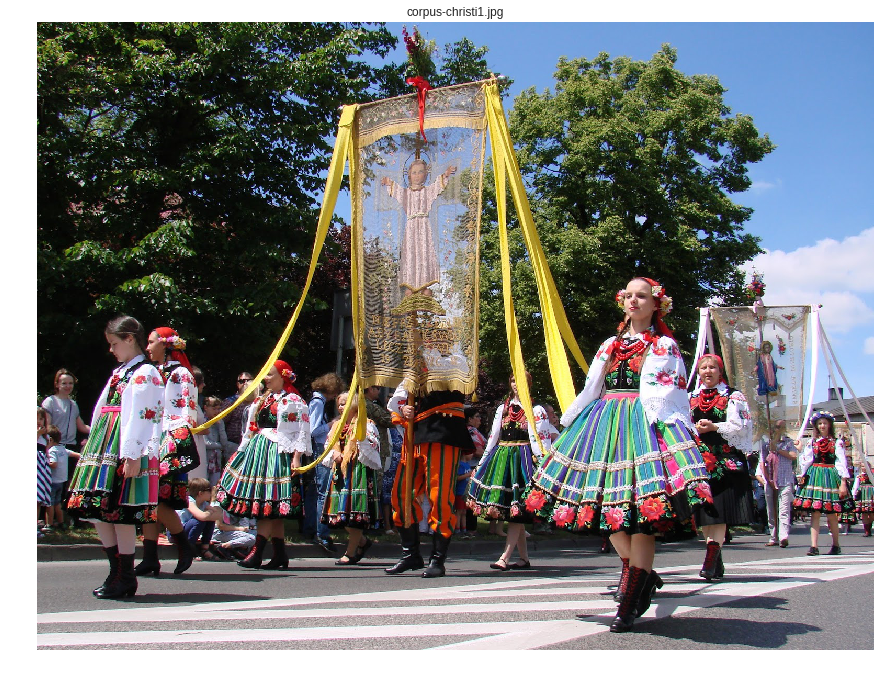

Processing images...
/content/images/corpus-christi1.jpg  ->  /content/images/out_corpus-christi1.jpg
Input image :  /content/images/corpus-christi1.jpg  Output image:  /content/images/out_corpus-christi1.jpg
Processing images..end..


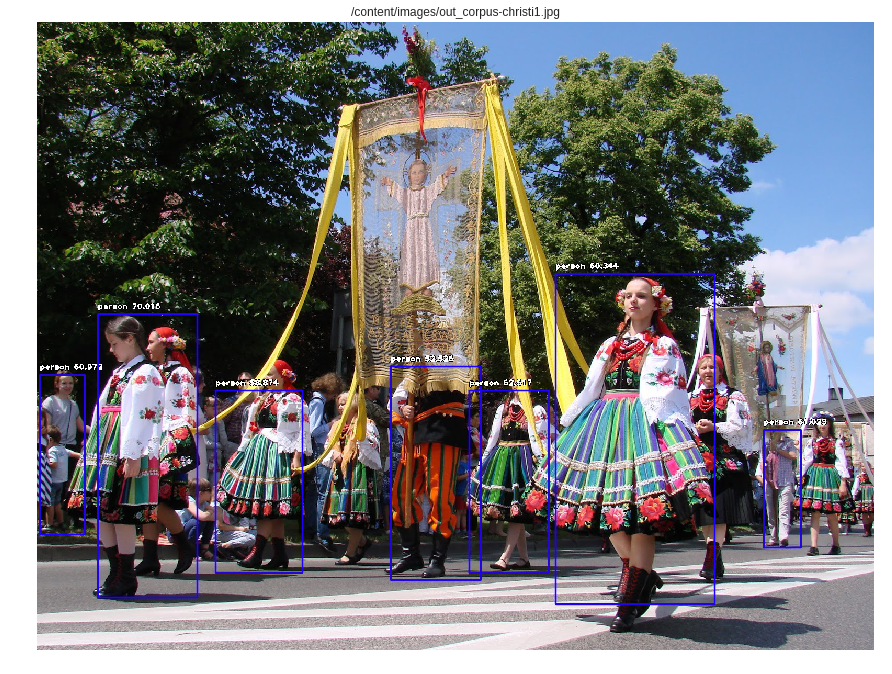

person  :  60.97209453582764  :  [  5 674  91 979]
person  :  61.02313995361328  :  [1389  779 1460 1004]
person  :  70.01528739929199  :  [ 116  558  306 1099]
person  :  58.873939514160156  :  [ 341  704  507 1052]
person  :  52.52590775489807  :  [ 676  658  848 1066]
person  :  62.517333030700684  :  [ 826  704  978 1052]
person  :  60.34356951713562  :  [ 991  481 1295 1112]


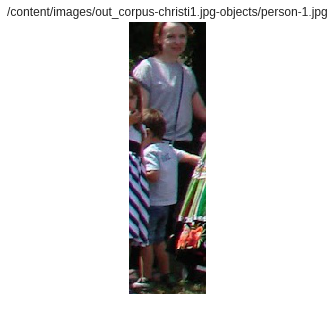

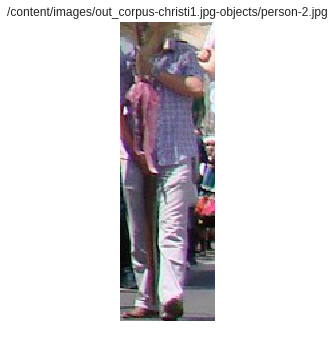

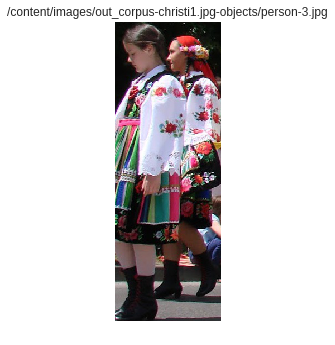

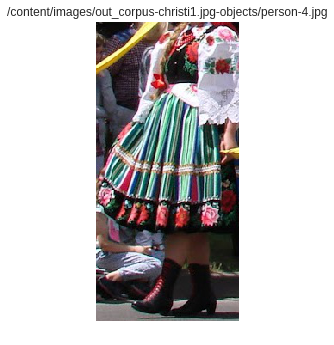

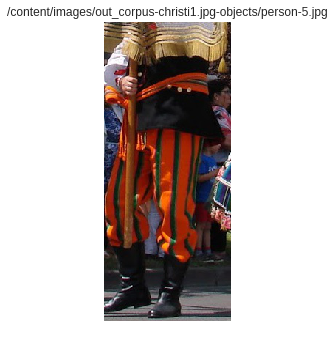

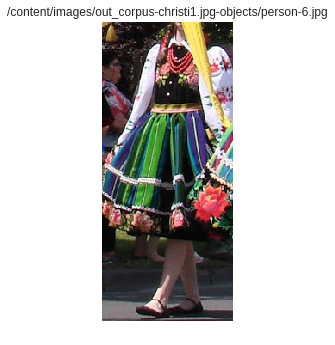

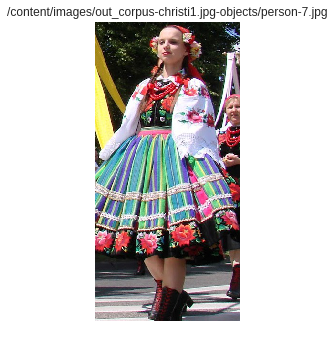

image_name:-> rzeka_bzura.jpg


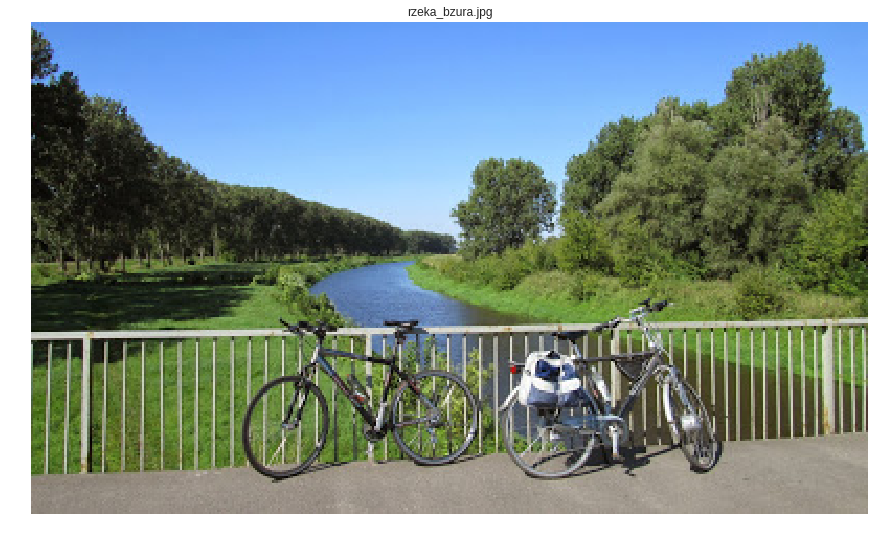

Processing images...
/content/images/rzeka_bzura.jpg  ->  /content/images/out_rzeka_bzura.jpg
Input image :  /content/images/rzeka_bzura.jpg  Output image:  /content/images/out_rzeka_bzura.jpg
Processing images..end..


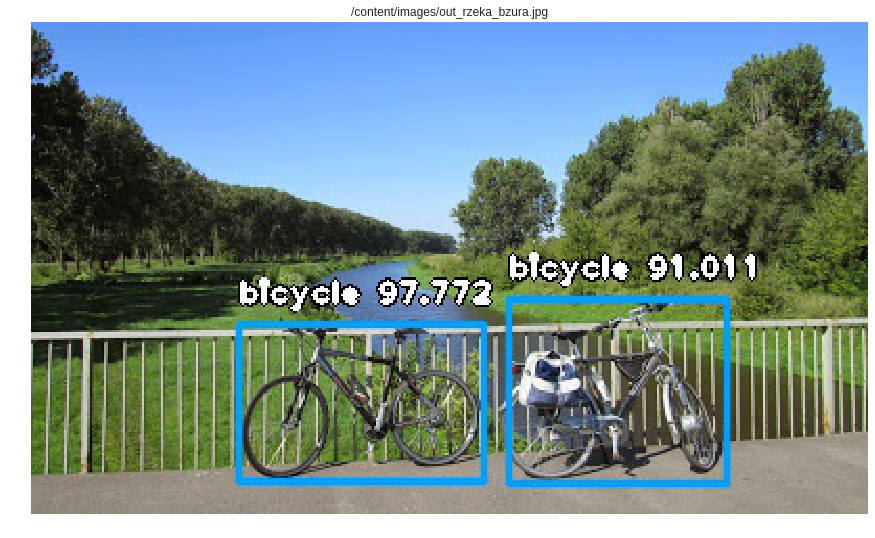

bicycle  :  97.77224063873291  :  [ 99 144 216 219]
bicycle  :  91.01145267486572  :  [228 132 332 220]


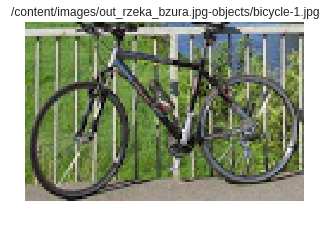

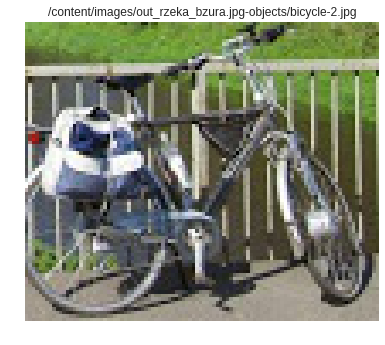

image_name:-> informatycy.jpg


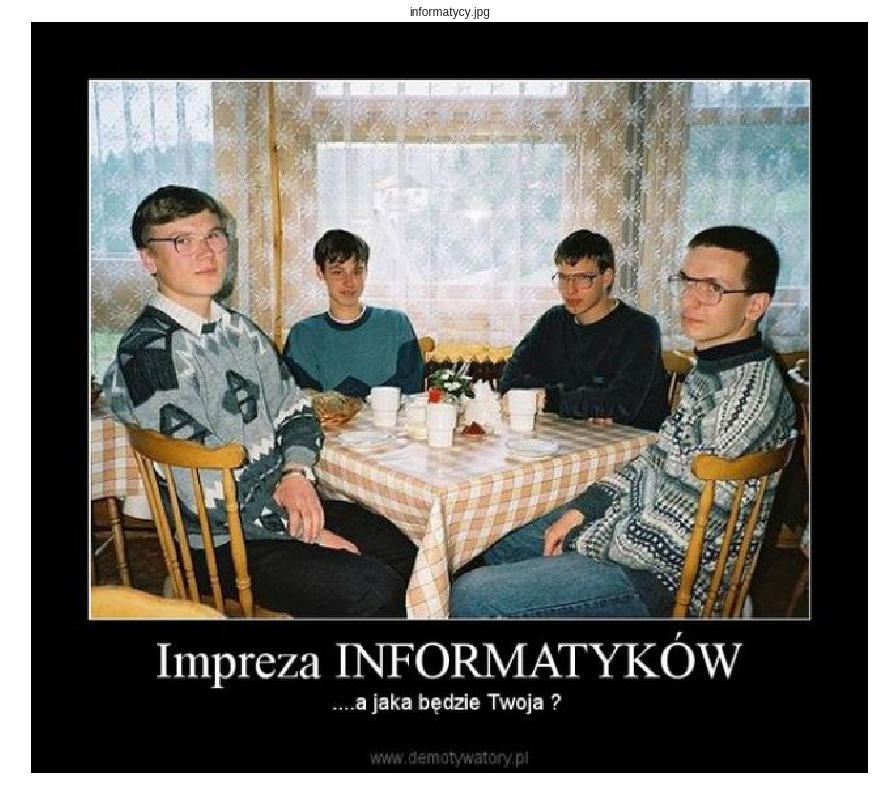

Processing images...
/content/images/informatycy.jpg  ->  /content/images/out_informatycy.jpg
Input image :  /content/images/informatycy.jpg  Output image:  /content/images/out_informatycy.jpg
Processing images..end..


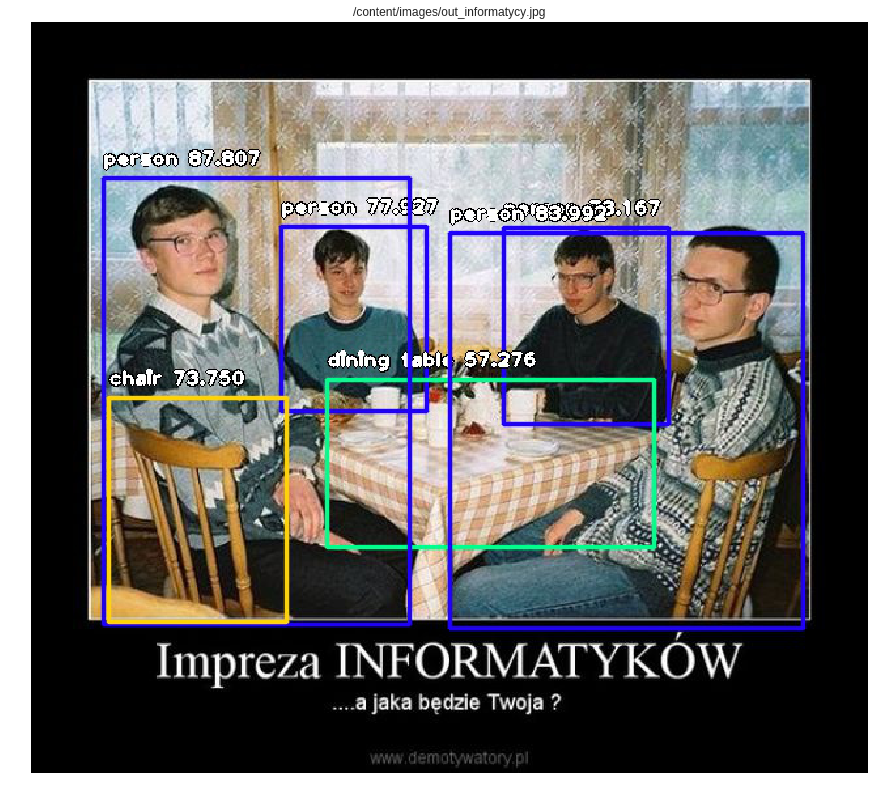

person  :  77.92699337005615  :  [191 156 302 297]
person  :  73.16679954528809  :  [361 157 487 307]
dining table  :  57.276374101638794  :  [226 273 476 401]
person  :  87.80669569969177  :  [ 55 119 289 460]
person  :  83.991539478302  :  [320 161 590 463]
chair  :  73.75040054321289  :  [ 59 287 195 458]


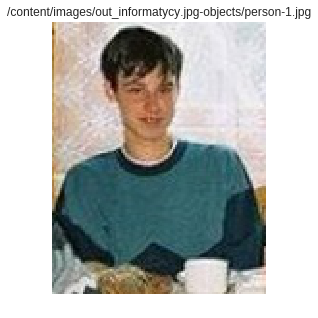

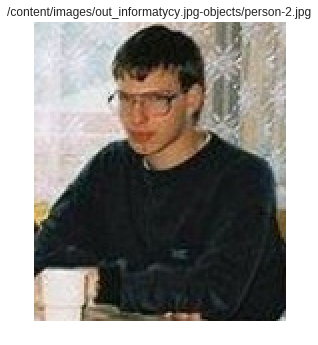

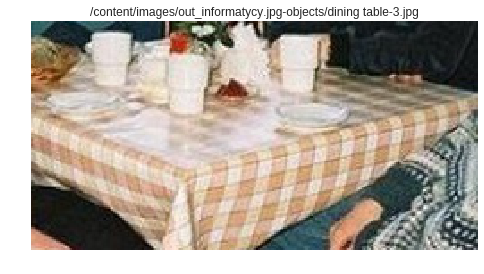

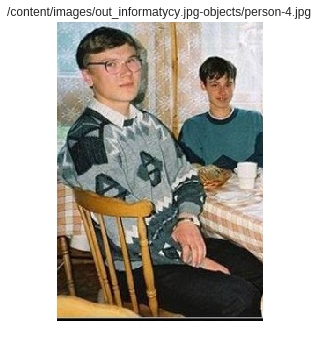

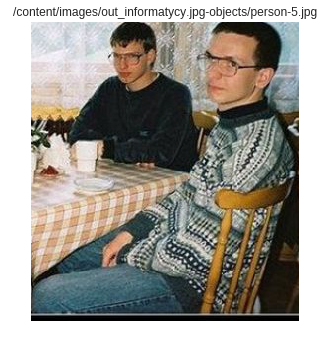

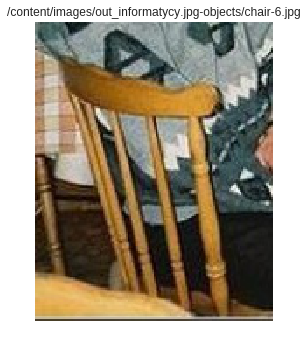

image_name:-> lowicz-nowy-rynek.jpg


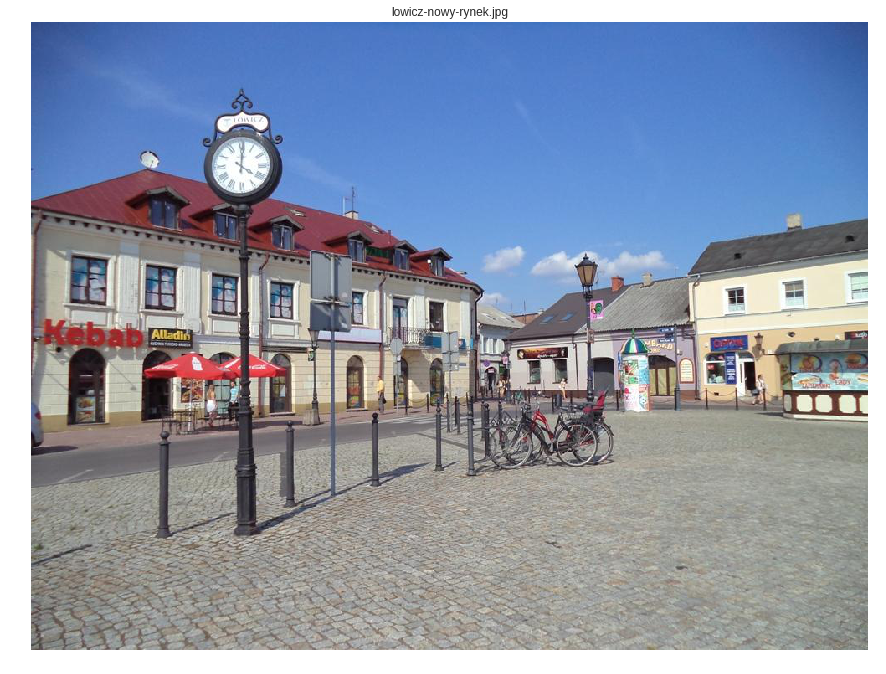

Processing images...
/content/images/lowicz-nowy-rynek.jpg  ->  /content/images/out_lowicz-nowy-rynek.jpg
Input image :  /content/images/lowicz-nowy-rynek.jpg  Output image:  /content/images/out_lowicz-nowy-rynek.jpg
Processing images..end..


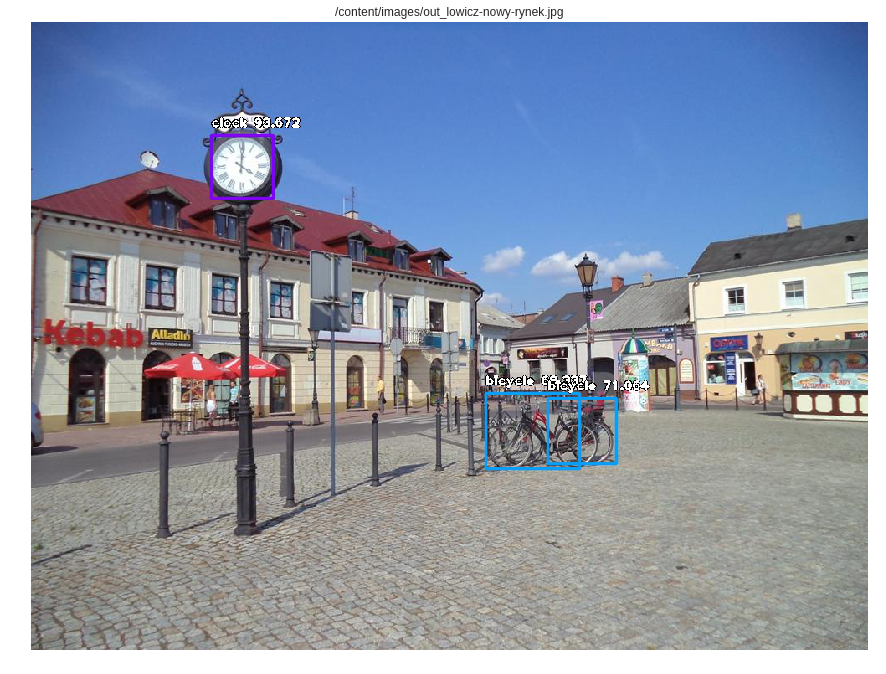

clock  :  93.67226958274841  :  [215 135 289 210]
bicycle  :  68.33732724189758  :  [543 443 655 533]
bicycle  :  71.06434106826782  :  [617 449 699 527]


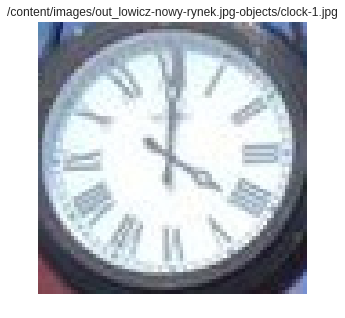

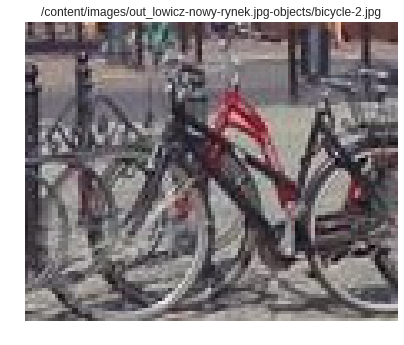

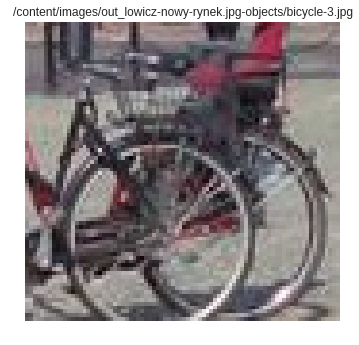

CPU times: user 29.2 s, sys: 2.66 s, total: 31.9 s
Wall time: 38.2 s


In [35]:
%%time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from imageai.Detection import ObjectDetection
import os
import glob

global extracted_images
global detections
global output_image

# pobieramy początkowy katalog

#home_directory=os.getcwd()
print("home_directory-> ",home_directory)

os.chdir(home_directory)

images_directory='images/'
execution_path = os.getcwd()


images_dict =	{
  "corpus-christi1.jpg": "https://1dayoutofwarsaw.pl/userdata/gfx/68d6db5cdbabb4de25cdfdcf66595aa2.jpg", 
  "rzeka_bzura.jpg" : "https://4.bp.blogspot.com/-y_Mp1ZofdpA/UmzL2EF2JRI/AAAAAAAAzVs/KbGtXB5gXzk/s400/26+%25C5%2581owicz+ul.Mostowa+rzeka+Bzura+B195.jpg" , 
  #"autobusy.jpg": "https://geek.justjoin.it/wp-content/uploads/2018/08/1-przed.jpeg",
  "lowicz-nowy-rynek.jpg": "https://static.polskieszlaki.pl/zdjecia/wycieczki/2014-11/lowicz-247756.jpg",
  #"lowicz-stary-rynek.jpg": "https://2.bp.blogspot.com/-7zWsmytmvi0/Wu4JROjYiqI/AAAAAAAAYk8/Xa-tF8qe8IM54LXQzeQVMfv-xuktZpXtgCLcBGAs/s1600/DSC04790%2B2.jpg",
  #"baszta.jpg": "http://www.polskaniezwykla.pl/pictures/original/269643.jpg",
  #"most-warszawski.jpg": "http://lok.art.pl/wp-content/uploads/2019/01/Most-Warszawski-ud.-Zofia-Linart-848x478.jpg",
  #"samochod.jpg": "https://imageai.readthedocs.io/en/latest/_images/image2.jpg",
  #"corpus-christi2.jpg":  "https://d-art.ppstatic.pl/kadry/k/r/fd/68/5942707de7741_o_full.jpg",
  #"rodzina-krolewska.jpg": "http://bi.gazeta.pl/im/05/df/11/z18741509V,Starsi-czlonkowie-rodziny-krolewskiej-balkonie-Pal.jpg",
  "informatycy.jpg":  "http://cdn1.thumbs.common.smcloud.net/common/2/4/s/2423986xy0Z.jpg/ru-1-r-640,0-n-2423986xy0Z.jpg"
  #"policjant.jpg": "http://www.policja.waw.pl/dokumenty/zalaczniki/168/168-52146.jpg",
  #"lowicz-stary-rynek-dzien.jpg": "http://www.polskiemiasta.tv/miasta_filmy/57.jpg"
    
    
}

#images_dict =	{
#  "brand": "Ford",
#  "model": "Mustang",
#  "year": 1964
#}
print(images_dict)

# pobranie obrazow
import_images(images_directory,images_dict,delete_existing=True)


# pobranie gotowego modelu
get_ml_models()
  
# przygotowanie modelu
detector=prepare_model(speed="fast")


os.chdir(home_directory)
images_directory='images/'
os.chdir(images_directory)
execution_path = os.getcwd()
print ('execution_path ->',execution_path)

# lista plikow do przeprocesowania
included_extensions = ['jpg','jpeg']
file_names = [fn for fn in os.listdir(execution_path)
              if any(fn.endswith(ext) for ext in included_extensions)]

for image_name in file_names:
  print("image_name:->",image_name)

  # obraz na wejsciu
  show_image(image_name,15)
  output_image,extracted_images,detections = process_image(detector,image_name)

  # obraz na wyjsciu
  show_image(output_image,15)

  # co zostało wykryte
  show_image_detection(output_image,detections,extracted_images)

  # dodatkowe obrazy
  show_extracted_images(detections,extracted_images,5)

del detector
#del extracted_images
#del detections
#del output_image

In [36]:
!ls -la *.jp*g

-rw-r--r-- 1 root root 657128 Mar 17 21:29 corpus-christi1.jpg
-rw-r--r-- 1 root root  72457 Mar 17 21:29 informatycy.jpg
-rw-r--r-- 1 root root 119407 Mar 17 21:29 lowicz-nowy-rynek.jpg
-rw-r--r-- 1 root root 990775 Mar 17 21:30 out_corpus-christi1.jpg
-rw-r--r-- 1 root root 146251 Mar 17 21:30 out_informatycy.jpg
-rw-r--r-- 1 root root 232258 Mar 17 21:30 out_lowicz-nowy-rynek.jpg
-rw-r--r-- 1 root root  55570 Mar 17 21:30 out_rzeka_bzura.jpg
-rw-r--r-- 1 root root  45225 Mar 17 21:29 rzeka_bzura.jpg


In [37]:
ls -la

total 151420
drwxr-xr-x 13 root root      4096 Mar 17 21:30 ./
drwxr-xr-x  1 root root      4096 Mar 17 21:01 ../
-rw-r--r--  1 root root    657128 Mar 17 21:29 corpus-christi1.jpg
drwxr-xr-x  3 root root      4096 Mar 17 21:10 images/
-rw-r--r--  1 root root     72457 Mar 17 21:29 informatycy.jpg
-rw-r--r--  1 root root    119407 Mar 17 21:29 lowicz-nowy-rynek.jpg
drwxr-xr-x  2 root root      4096 Mar 17 14:03 out_autobusy.jpg-objects/
-rw-r--r--  1 root root    990775 Mar 17 21:30 out_corpus-christi1.jpg
drwxr-xr-x  2 root root      4096 Mar 17 18:00 out_corpus-christi1.jpg-objects/
-rw-r--r--  1 root root    146251 Mar 17 21:30 out_informatycy.jpg
drwxr-xr-x  2 root root      4096 Mar 17 19:25 out_informatycy.jpg-objects/
-rw-r--r--  1 root root    232258 Mar 17 21:30 out_lowicz-nowy-rynek.jpg
drwxr-xr-x  2 root root      4096 Mar 17 15:17 out_lowicz-nowy-rynek.jpg-objects/
drwxr-xr-x  2 root root      4096 Mar 17 14:09 out_out_autobusy.jpg-objects/
drwxr-xr-x  2 root root      4096

In [19]:
#os.chdir('..')
#os.chdir('content/')
#!rm *.h5
!ls -la


total 149984
drwxr-xr-x  3 root root      4096 Mar 17 21:10 .
drwxr-xr-x 13 root root      4096 Mar 17 21:10 ..
-rw-r--r--  1 root root    657128 Mar 17 21:10 corpus-christi1.jpg
drwxr-xr-x  5 root root      4096 Mar 17 21:01 images
-rw-r--r--  1 root root     72457 Mar 17 21:10 informatycy.jpg
-rw-r--r--  1 root root    119407 Mar 17 21:10 lowicz-nowy-rynek.jpg
-rw-r--r--  1 root root 152661008 May 26  2018 resnet50_coco_best_v2.0.1.h5
-rw-r--r--  1 root root     45225 Mar 17 21:10 rzeka_bzura.jpg
